<a href="https://colab.research.google.com/github/chanyoung98/predicting_the_transfer_fee_of_soccer_player/blob/main/fc203_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 축구선수 이적료 예측 모델링

#### 팀 FC203 [응용통계학과 김찬영, 김청환, 이현석]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
PATH = '/content/drive/MyDrive/Colab Notebooks/통계최강자전/'
df17 = pd.read_csv(PATH + 'transfermarkt_fbref_201718.csv', sep=';')
df18 = pd.read_csv(PATH + 'transfermarkt_fbref_201819.csv', sep=';')
df19 = pd.read_csv(PATH + 'transfermarkt_fbref_201920.csv', sep=';')
df17.head(3)

<ipython-input-6-97a41f5e0d32>:3: DtypeWarning: Columns (395) have mixed types. Specify dtype option on import or set low_memory=False.
  df18 = pd.read_csv(PATH + 'transfermarkt_fbref_201819.csv', sep=';')


,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


## Data preprocessing

In [7]:
# Processing missing values for each season's data
df17 = df17.fillna(0)
df17 = df17[df17.foot!=0]
df18.dropna(axis=0, inplace=True)
df19['CLBestScorer'] = df19['CLBestScorer'].fillna(0)
df19.dropna(axis=0, inplace=True)

# Changing column name('Unnamed: 0') / Data merging
df17.rename(columns={'Unnamed: 0':'Column1'}, inplace=True)
df0 = pd.concat([df17, df18])
df1 = pd.concat([df0, df19])
df1.tail()

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
2639,1997.0,Daniel Podence,pt POR,"FW,MF",Wolves,23.0,1995.0,12000000.0,165.0,Forward - Right Winger,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
2640,2202.0,Romain SaĂŻss,ma MAR,DF,Wolves,29.0,1990.0,4000000.0,188.0,Defender - Centre-Back,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
2641,2523.0,Adama TraorĂ©,es ESP,"FW,MF",Wolves,23.0,1996.0,25000000.0,178.0,Forward - Right Winger,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
2642,2567.0,JesĂşs Vallejo,es ESP,DF,Wolves,22.0,1997.0,6000000.0,184.0,Defender - Centre-Back,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
2643,2615.0,RĂşben Vinagre,pt POR,DF,Wolves,20.0,1999.0,9000000.0,174.0,Defender - Left-Back,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#


In [8]:
# Identifying duplicated rows
duplicated_data = df1[df1.duplicated()]
duplicated_data = duplicated_data.dropna()
duplicated_data

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season


In [9]:
# Index reset
df1.reset_index(drop=True, inplace=True)
df1.tail()

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
6947,1997.0,Daniel Podence,pt POR,"FW,MF",Wolves,23.0,1995.0,12000000.0,165.0,Forward - Right Winger,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
6948,2202.0,Romain SaĂŻss,ma MAR,DF,Wolves,29.0,1990.0,4000000.0,188.0,Defender - Centre-Back,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
6949,2523.0,Adama TraorĂ©,es ESP,"FW,MF",Wolves,23.0,1996.0,25000000.0,178.0,Forward - Right Winger,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
6950,2567.0,JesĂşs Vallejo,es ESP,DF,Wolves,22.0,1997.0,6000000.0,184.0,Defender - Centre-Back,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#
6951,2615.0,RĂşben Vinagre,pt POR,DF,Wolves,20.0,1999.0,9000000.0,174.0,Defender - Left-Back,...,1.55,47.1,34.8,12.3,0.32,24758,0.0,0.0,0.0,201920#


In [10]:
# Delete 'birth_year' column
df1.drop(columns=['birth_year'], axis=1, inplace=True)

# Fill zero data
df1.iloc[2218,5] = 19
df1.iloc[4738,5] = 17
df1.iloc[5024,5] = 20
df1.iloc[6452,5] = 17

df1.iloc[2218,2] = 'es ESP'

df1.iloc[2218,3] = 'DF'

df1.iloc[4494,7] = 183
df1.iloc[4738,7] = 178
df1.iloc[4836,7] = 182
df1.iloc[4841,7] = 176
df1.iloc[5189,7] = 179
df1.iloc[5454,7] = 181
df1.iloc[5488,7] = 188
df1.iloc[6439,7] = 178

# Reorganizing the values for 'position2'
df1['position2'].value_counts()

Defender - Centre-Back             1248
Forward - Centre-Forward            666
Midfielder - Central Midfield       659
Defender - Right-Back               593
Goalkeeper                          531
Defender - Left-Back                531
Midfielder - Defensive Midfield     366
Forward - Right Winger              337
attack - Centre-Forward             324
midfield - Central Midfield         313
Forward - Left Winger               309
Midfielder - Attacking Midfield     255
midfield - Defensive Midfield       183
attack - Left Winger                147
attack - Right Winger               142
midfield - Attacking Midfield       112
Forward - Second Striker             62
Midfielder - Left Midfield           55
Midfielder - Right Midfield          41
attack - Second Striker              34
midfield - Right Midfield            22
midfield - Left Midfield             21
Central Midfield                      1
Name: position2, dtype: int64

In [11]:
df1['position2'] = df1['position2'].replace('attack - Centre-Forward','Forward - Centre-Forward')
df1['position2'] = df1['position2'].replace('attack - Left Winger','Forward - Left Winger')
df1['position2'] = df1['position2'].replace('attack - Right Winger','Forward - Right Winger')
df1['position2'] = df1['position2'].replace('attack - Second Striker','Forward - Second Striker')

df1['position2'] = df1['position2'].replace('Central Midfield','Midfielder - Central Midfield')
df1['position2'] = df1['position2'].replace('midfield - Central Midfield','Midfielder - Central Midfield')
df1['position2'] = df1['position2'].replace('midfield - Attacking Midfield','Midfielder - Attacking Midfield')
df1['position2'] = df1['position2'].replace('midfield - Defensive Midfield','Midfielder - Defensive Midfield')
df1['position2'] = df1['position2'].replace('midfield - Right Midfield','Midfielder - Right Midfield')
df1['position2'] = df1['position2'].replace('midfield - Left Midfield','Midfielder - Left Midfield')

df1['position2'].value_counts()

Defender - Centre-Back             1248
Forward - Centre-Forward            990
Midfielder - Central Midfield       973
Defender - Right-Back               593
Midfielder - Defensive Midfield     549
Defender - Left-Back                531
Goalkeeper                          531
Forward - Right Winger              479
Forward - Left Winger               456
Midfielder - Attacking Midfield     367
Forward - Second Striker             96
Midfielder - Left Midfield           76
Midfielder - Right Midfield          63
Name: position2, dtype: int64

In [12]:
# Reorganizing the values for 'position'
df1['position'].value_counts()

DF       2087
MF       1412
FW        908
FW,MF     784
MF,FW     668
GK        524
DF,MF     314
MF,DF     152
DF,FW      56
FW,DF      46
GK,MF       1
Name: position, dtype: int64

In [13]:
df1['position'] = df1['position'].replace('GK,MF','GK')
for i in range(0,len(df1)-1):
    if df1.iloc[i,8].startswith('Goalkeeper'):
        df1.iloc[i,3] = 'GK'
    elif df1.iloc[i,8].startswith('Defender'):
        df1.iloc[i,3] = 'DF'
    elif df1.iloc[i,8].startswith('Midfielder'):
        df1.iloc[i,3] = 'MF'
    elif df1.iloc[i,8].startswith('Forward'):
        df1.iloc[i,3] = 'FW'

df1['position'].value_counts()

DF    2372
MF    2028
FW    2021
GK     531
Name: position, dtype: int64

In [14]:
# Delete the columns whose names with 'm' on the back
df1.drop(columns=list(df1)[197:380], axis=1, inplace=True)

# Delete the column 'Attendance'
df1.drop(columns=['Attendance'], axis=1, inplace=True)

# Organizing the order of columns
df1_1 = df1.columns[:11].tolist()
df1_2 = df1.columns[11:-4].tolist()
df1_3 = df1.columns[-4:].tolist()
col = df1_1 + df1_3 + df1_2
df1 = df1[col]
df1_1 = df1.columns[:5].tolist()
df1_2 = df1.columns[5:8].tolist()
df1_3 = df1.columns[8:15].tolist()
df1_4 = df1.columns[15:].tolist()
col = df1_1 + df1_3 + df1_2 + df1_4
df1 = df1[col]

# Delete the column 'Column1'
df1.drop(columns=['Column1'], axis=1, inplace=True)

In [15]:
# Multiple columns label encoding

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
    def fit_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))
        
        return output
    
    def inverse_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')
        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise
        return output
from collections import defaultdict
class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
    def fit_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))
        
        return output
    
    def inverse_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')
        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise
        return output

mcle = MultiColLabelEncoder()
df2 = mcle.fit_transform(df1, columns=['nationality','position','squad','position2','foot','league','Season'])
df2.head()

,player,nationality,position,squad,position2,foot,league,CL,WinCL,CLBestScorer,...,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90
0,Burgui,41,1,0,4,2,1,0.0,0.0,0.0,...,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37
1,Raphaël Varane,43,0,96,0,2,1,1.0,1.0,0.0,...,6.0,94.0,44.0,50.0,76.0,2.00,83.3,45.4,37.9,1.00
2,Rubén Duarte,41,0,0,1,1,1,0.0,0.0,0.0,...,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37
3,Samuel Umtiti,43,0,11,0,1,1,1.0,0.0,0.0,...,1.0,99.0,29.0,70.0,93.0,2.45,78.3,41.1,37.2,0.98
4,Manu García,41,3,0,10,1,1,0.0,0.0,0.0,...,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37


In [16]:
inverse_df2 = mcle.inverse_transform(df2, columns=['nationality','position','squad','position2','foot','league','Season'])
inverse_df2.head()

,player,nationality,position,squad,position2,foot,league,CL,WinCL,CLBestScorer,...,L,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90
0,Burgui,es ESP,FW,Alavés,Forward - Left Winger,right,La Liga,0.0,0.0,0.0,...,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37
1,Raphaël Varane,fr FRA,DF,Real Madrid,Defender - Centre-Back,right,La Liga,1.0,1.0,0.0,...,6.0,94.0,44.0,50.0,76.0,2.00,83.3,45.4,37.9,1.00
2,Rubén Duarte,es ESP,DF,Alavés,Defender - Left-Back,left,La Liga,0.0,0.0,0.0,...,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37
3,Samuel Umtiti,fr FRA,DF,Barcelona,Defender - Centre-Back,left,La Liga,1.0,0.0,0.0,...,1.0,99.0,29.0,70.0,93.0,2.45,78.3,41.1,37.2,0.98
4,Manu García,es ESP,MF,Alavés,Midfielder - Defensive Midfield,left,La Liga,0.0,0.0,0.0,...,21.0,40.0,50.0,-10.0,47.0,1.24,39.0,53.2,-14.2,-0.37


In [17]:
# Split df into field players and goalkeepers
c1 = df2.columns[:14].tolist()
c2 = df2.columns[-55:].tolist()
gkcol = c1 + c2
df2_gk = df2[gkcol]
gks = df2_gk['position'] == 2
df2_gk = df2_gk.loc[gks, :]

c3 = df2.columns[:-55].tolist()
c4 = df2.columns[-13:].tolist()
fpcol = c3 + c4
df2_fp = df2[fpcol]
fps = df2_fp['position'] != 2
df2_fp = df2_fp.loc[fps, :]

# Reset each index
df2_fp.reset_index(drop=True, inplace=True)
df2_gk.reset_index(drop=True, inplace=True)

In [18]:
# Stepwise variables selection of field players data

# Delete columns for response and categorical variables
df0_fp = df2_fp.drop(['value','player','nationality','position','squad','position2','foot','league','CL','WinCL','CLBestScorer','Season','age','height'], axis=1)

# Explanatory variables and response variable
variables = df0_fp.columns.tolist()
y = df2_fp['value']
selected_variables = []
# Significance level
sl_enter = 0.05
sl_remove = 0.05
sv_per_step = []
adjusted_r_squared = []
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df0_fp[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df0_fp[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df0_fp[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-18-1122852ea1ba>:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## p-value
<ipython-input-18-1122852ea1ba>:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## p-value
<ipython-input-18-1122852ea1ba>:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## p-value
<ipython-input-18-1122852ea1ba>:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## p-value
<ipython-input-18-112285

In [19]:
# Number of selected variables
len_stepwise_fp = len(selected_variables)
len_stepwise_fp

45

In [20]:
# List of selected variables
stepwise_variables_fp = selected_variables
stepwise_variables_fp

['goals',
 'fouls',
 'W',
 'through_balls',
 'pens_made',
 'games',
 'touches_att_pen_area',
 'passes_into_final_third',
 'players_dribbled_past',
 'miscontrols',
 'xGA',
 'passes_low',
 'passes_completed',
 'passes_other_body',
 'aerials_won',
 'passes_completed_medium',
 'gca_fouled',
 'npxg_net',
 'passes_free_kicks',
 'touches_def_pen_area',
 'minutes_90s',
 'pressures_def_3rd',
 'dribbles_vs',
 'tackles_won',
 'corner_kicks',
 'sca_passes_dead',
 'goals_per_shot_on_target',
 'touches_def_3rd',
 'ball_recoveries',
 'sca_passes_live',
 'passes_into_penalty_area',
 'gca_passes_live',
 'crosses_into_penalty_area',
 'progressive_passes',
 'passes_oob',
 'dribbles_completed',
 'passes_total_distance',
 'MP',
 'throw_ins',
 'passes_dead',
 'shots_free_kicks',
 'dribbles_completed_pct',
 'assists',
 'pens_conceded',
 'corner_kicks_in']

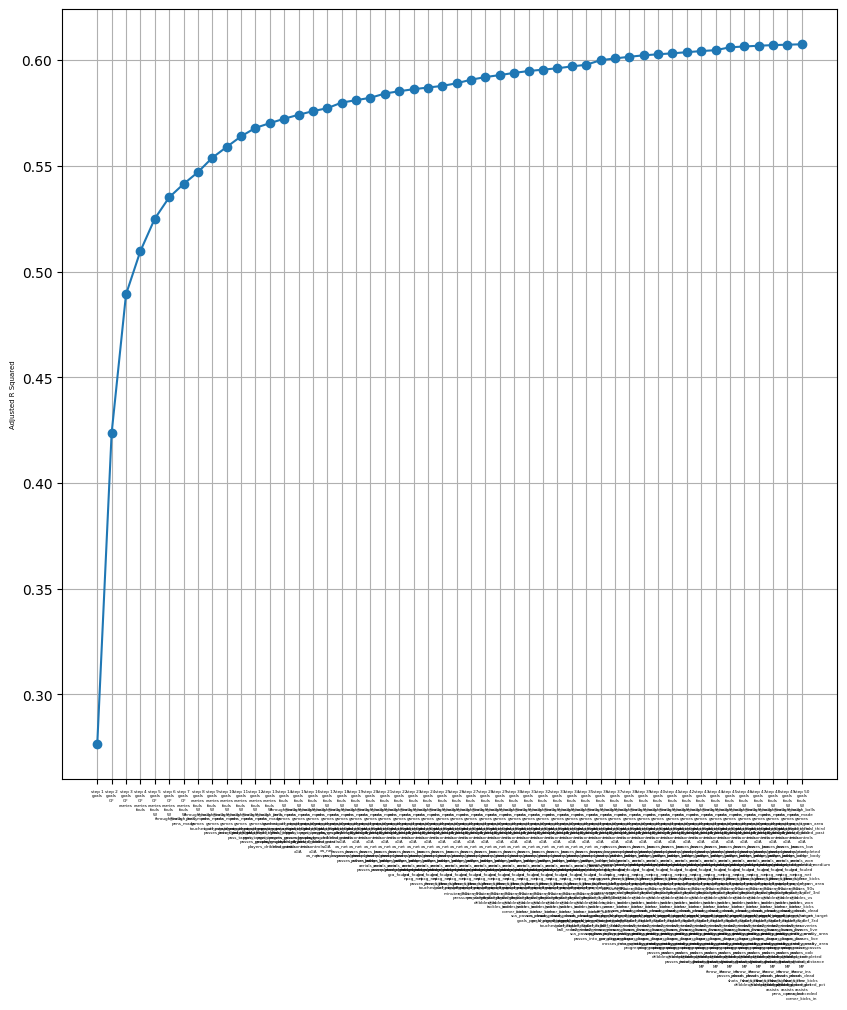

In [21]:
# Visulalization of stepwise selection for field players
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 5
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=3)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [22]:
# Stepwise variables selection of goalkeepers data

# Delete columns for response and categorical variables
df0_gk = df2_gk.drop(['value','player','nationality','position','squad','position2','foot','league','CL','WinCL','CLBestScorer','Season','age','height'], axis=1)

# Explanatory variables and response variable
variables = df0_gk.columns.tolist()
y = df2_gk['value']
selected_variables = []
# Significance level
sl_enter = 0.05
sl_remove = 0.05
sv_per_step = []
adjusted_r_squared = []
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df0_gk[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df0_gk[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df0_gk[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-22-d774d91b7b0e>:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## p-value
<ipython-input-22-d774d91b7b0e>:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## p-value
<ipython-input-22-d774d91b7b0e>:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## p-value
<ipython-input-22-d774d91b7b0e>:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## p-value
<ipython-input-22-d774d9

In [23]:
# Number of selected variables
len_stepwise_gk = len(selected_variables)
len_stepwise_gk

5

In [24]:
# List of selected variables
stepwise_variables_gk = selected_variables
stepwise_variables_gk

['wins_gk', 'clean_sheets', 'passes_launched_gk', 'pens_saved', 'MP']

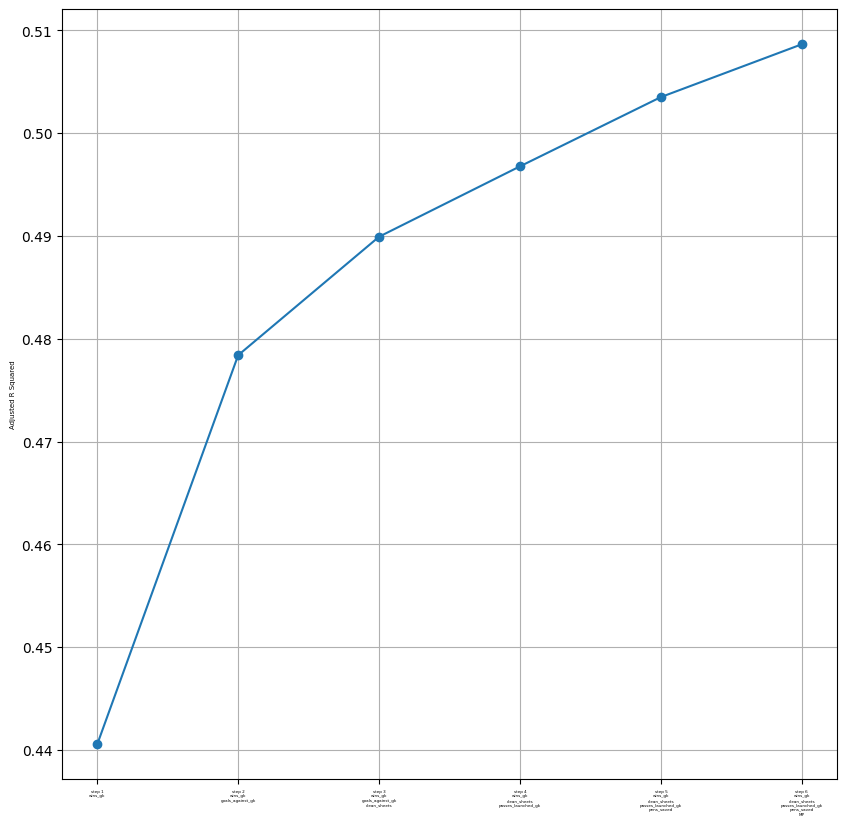

In [25]:
# Visualization of stepwise selection for goalkeepers
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 5
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=3)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [26]:
# Vif for field players data
vif_fp = df2_fp[stepwise_variables_fp]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_fp.values, i) for i in range(vif_fp.shape[1])]
vif["features"] = vif_fp.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.477166,pens_conceded
1,1.656575,gca_fouled
2,2.243684,shots_free_kicks
3,2.367441,pens_made
4,2.388769,goals_per_shot_on_target
5,2.794388,corner_kicks_in
6,3.040383,npxg_net
7,3.155304,through_balls
8,4.028410,passes_other_body
9,5.424077,aerials_won


In [27]:
# Vif for goalkeepers data
vif_gk = df2_gk[stepwise_variables_gk]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_gk.values, i) for i in range(vif_gk.shape[1])]
vif["features"] = vif_gk.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.783736,pens_saved
1,2.328734,MP
2,4.768164,passes_launched_gk
3,12.012378,wins_gk
4,15.321328,clean_sheets


In [28]:
# Vif for goalkeepers data
vif_gk = df2_gk[stepwise_variables_gk]
vif_gk.drop(columns=['wins_gk'], axis=1, inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_gk.values, i) for i in range(vif_gk.shape[1])]
vif["features"] = vif_gk.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

<ipython-input-28-2d64f26fc1d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_gk.drop(columns=['wins_gk'], axis=1, inplace=True)


,VIF Factor,features
0,1.778623,pens_saved
1,2.280624,MP
2,4.145338,clean_sheets
3,4.697773,passes_launched_gk


In [29]:
# Applying the result
vif_col_fp = ['pens_conceded','gca_dribbles','shots_free_kicks','goals_per_shot_on_target','pens_att','through_balls','xg_net',
             'passes_other_body','sca_shots','sca_fouled','aerials_won','passes_free_kicks','crosses_into_penalty_area',
             'dribbles_completed_pct','fouled','gca']
vif_col_gk = ['pens_saved','MP','clean_sheets','passes_launched_gk']
col_fp = list(df2_fp.iloc[:, 0:14]) + vif_col_fp
df3_fp = df2_fp[col_fp]
col_gk = list(df2_gk.iloc[:, 0:14]) + vif_col_gk
df3_gk = df2_gk[col_gk]

# Delete the columns 'plyaer', 'position2'
df3_fp.drop(columns=['player','position2'], axis=1, inplace=True)
df3_gk.drop(columns=['player','position2'], axis=1, inplace=True)

<ipython-input-29-33375d0d0184>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_fp.drop(columns=['player','position2'], axis=1, inplace=True)
<ipython-input-29-33375d0d0184>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_gk.drop(columns=['player','position2'], axis=1, inplace=True)


In [30]:
df3_fp.head()

,nationality,position,squad,foot,league,CL,WinCL,CLBestScorer,Season,age,...,xg_net,passes_other_body,sca_shots,sca_fouled,aerials_won,passes_free_kicks,crosses_into_penalty_area,dribbles_completed_pct,fouled,gca
0,41,1,0,2,1,0.0,0.0,0.0,0,23.0,...,0.1,0.0,2.0,4.0,1.0,3.0,1.0,77.4,19.0,3.0
1,43,0,96,2,1,1.0,1.0,0.0,0,24.0,...,-0.9,5.0,3.0,0.0,31.0,24.0,0.0,83.3,12.0,2.0
2,41,0,0,1,1,0.0,0.0,0.0,0,21.0,...,-0.5,2.0,1.0,5.0,22.0,5.0,8.0,91.7,35.0,2.0
3,43,0,11,1,1,1.0,0.0,0.0,0,23.0,...,-0.1,8.0,0.0,1.0,41.0,19.0,0.0,75.0,25.0,1.0
4,41,3,0,1,1,0.0,0.0,0.0,0,31.0,...,-0.1,2.0,2.0,6.0,42.0,7.0,2.0,81.0,72.0,2.0


In [31]:
df3_gk.head()

,nationality,position,squad,foot,league,CL,WinCL,CLBestScorer,Season,age,value,height,pens_saved,MP,clean_sheets,passes_launched_gk
0,41,2,0,1,1,0.0,0.0,0.0,0,25.0,9000000.0,185.0,3.0,38.0,12.0,586.0
1,41,2,0,2,1,0.0,0.0,0.0,0,20.0,1000000.0,185.0,0.0,38.0,0.0,10.0
2,43,2,2,2,2,0.0,0.0,0.0,0,34.0,20000.0,184.0,0.0,38.0,0.0,15.0
3,43,2,2,2,2,0.0,0.0,0.0,0,30.0,3000000.0,182.0,0.0,38.0,11.0,725.0
4,43,2,3,1,2,0.0,0.0,0.0,0,34.0,50000.0,188.0,0.0,38.0,4.0,228.0


In [32]:
print(df3_fp.shape)
print(df3_gk.shape)

(6421, 28)
(531, 16)


In [33]:
# Data scaling for PCA
df3_fp_pca = df3_fp.iloc[:, 12:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
result = scaler.fit_transform(df3_fp_pca)
data_scaled = pd.DataFrame(result)
data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.421000e+03
mean,2.213184e-18,-2.213184e-18,2.323843e-17,3.098458e-17,-9.129384e-18,4.426368e-18,5.532960e-19,-4.979664e-17,-7.524826e-17,-1.770547e-17,-1.770547e-17,-8.852736e-18,-3.541094e-17,-1.421971e-16,-2.213184e-17,1.991866e-17
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-4.049025e-01,-3.497560e-01,-3.125010e-01,-8.033159e-01,-2.603871e-01,-5.519409e-01,-6.164943e+00,-7.973580e-01,-6.832236e-01,-6.437464e-01,-8.107176e-01,-7.201735e-01,-6.381164e-01,-2.227858e+00,-1.029660e+00,-7.652776e-01
25%,-4.049025e-01,-3.497560e-01,-3.125010e-01,-8.033159e-01,-2.603871e-01,-5.519409e-01,-4.058073e-01,-5.830314e-01,-6.832236e-01,-6.437464e-01,-6.517589e-01,-6.703944e-01,-6.381164e-01,-3.096647e-01,-7.388117e-01,-7.652776e-01
50%,-4.049025e-01,-3.497560e-01,-3.125010e-01,-2.962709e-01,-2.603871e-01,-5.519409e-01,-8.585536e-02,-3.687047e-01,-2.214364e-01,-2.731290e-01,-3.338416e-01,-4.214986e-01,-4.457618e-01,1.085015e-01,-2.734545e-01,-3.091302e-01
75%,-4.049025e-01,-3.497560e-01,-3.125010e-01,4.837985e-01,-2.603871e-01,2.864817e-01,3.140846e-01,2.742754e-01,2.403509e-01,9.748835e-02,2.622533e-01,2.754095e-01,1.313020e-01,5.842135e-01,4.827511e-01,3.750908e-01
max,9.556319e+00,1.553681e+01,1.838471e+01,3.097031e+00,1.600368e+01,1.957020e+01,1.015261e+01,1.313388e+01,1.178503e+01,1.121601e+01,9.760032e+00,8.538748e+00,8.787260e+00,1.608529e+00,8.684673e+00,9.041891e+00


In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.90)+1

print(d)

11


In [35]:
# Processing PCA
pca = PCA(n_components=10)
X_redufced = pca.fit_transform(data_scaled)
result = pd.DataFrame(X_redufced) 
result

,0,1,2,3,4,5,6,7,8,9
0,-0.114021,0.794820,0.048132,0.200802,-0.006153,-1.066376,0.003152,-0.097474,1.060440,0.537769
1,-0.551850,-0.853237,-0.716878,-0.571188,0.403582,-1.100049,-0.342823,0.366134,-0.486845,0.221188
2,0.315503,-1.940694,-1.050466,0.383511,-0.964051,0.113453,2.835954,-1.176430,1.406322,0.348393
3,-0.388489,-1.180292,0.252729,-0.673271,0.133535,-0.622214,-0.683045,0.360870,0.093796,-0.738499
4,1.912225,-0.549556,0.277757,-1.349356,0.326239,-0.775639,-0.355057,-1.582995,2.055626,-0.763453
...,...,...,...,...,...,...,...,...,...,...
6416,-0.827285,1.094987,0.273594,-0.178586,-0.211198,-1.027333,0.736182,0.214511,0.167914,0.213800
6417,0.516999,-2.980781,0.190652,-1.039191,0.502628,-0.332186,-1.255526,0.732786,-0.755802,-0.151114
6418,4.581098,0.462026,-0.456580,-0.825325,-0.560257,-0.823766,0.060652,0.448670,3.060358,-1.203156
6419,-2.056018,0.202595,-0.099135,0.263833,0.272449,-1.826330,0.307526,-0.434713,-0.190398,-0.103663


In [36]:
# Applying the PCA result
df4_fp = df3_fp.iloc[:,0:12]
df4_fp = pd.concat([df4_fp, result], axis=1)
df4_gk = df3_gk
df4_fp

,nationality,position,squad,foot,league,CL,WinCL,CLBestScorer,Season,age,...,0,1,2,3,4,5,6,7,8,9
0,41,1,0,2,1,0.0,0.0,0.0,0,23.0,...,-0.114021,0.794820,0.048132,0.200802,-0.006153,-1.066376,0.003152,-0.097474,1.060440,0.537769
1,43,0,96,2,1,1.0,1.0,0.0,0,24.0,...,-0.551850,-0.853237,-0.716878,-0.571188,0.403582,-1.100049,-0.342823,0.366134,-0.486845,0.221188
2,41,0,0,1,1,0.0,0.0,0.0,0,21.0,...,0.315503,-1.940694,-1.050466,0.383511,-0.964051,0.113453,2.835954,-1.176430,1.406322,0.348393
3,43,0,11,1,1,1.0,0.0,0.0,0,23.0,...,-0.388489,-1.180292,0.252729,-0.673271,0.133535,-0.622214,-0.683045,0.360870,0.093796,-0.738499
4,41,3,0,1,1,0.0,0.0,0.0,0,31.0,...,1.912225,-0.549556,0.277757,-1.349356,0.326239,-0.775639,-0.355057,-1.582995,2.055626,-0.763453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,89,1,128,2,3,0.0,0.0,0.0,2,23.0,...,-0.827285,1.094987,0.273594,-0.178586,-0.211198,-1.027333,0.736182,0.214511,0.167914,0.213800
6417,69,0,128,1,3,0.0,0.0,0.0,2,29.0,...,0.516999,-2.980781,0.190652,-1.039191,0.502628,-0.332186,-1.255526,0.732786,-0.755802,-0.151114
6418,41,1,128,2,3,0.0,0.0,0.0,2,23.0,...,4.581098,0.462026,-0.456580,-0.825325,-0.560257,-0.823766,0.060652,0.448670,3.060358,-1.203156
6419,41,0,128,2,3,0.0,0.0,0.0,2,22.0,...,-2.056018,0.202595,-0.099135,0.263833,0.272449,-1.826330,0.307526,-0.434713,-0.190398,-0.103663


<Figure size 640x480 with 0 Axes>

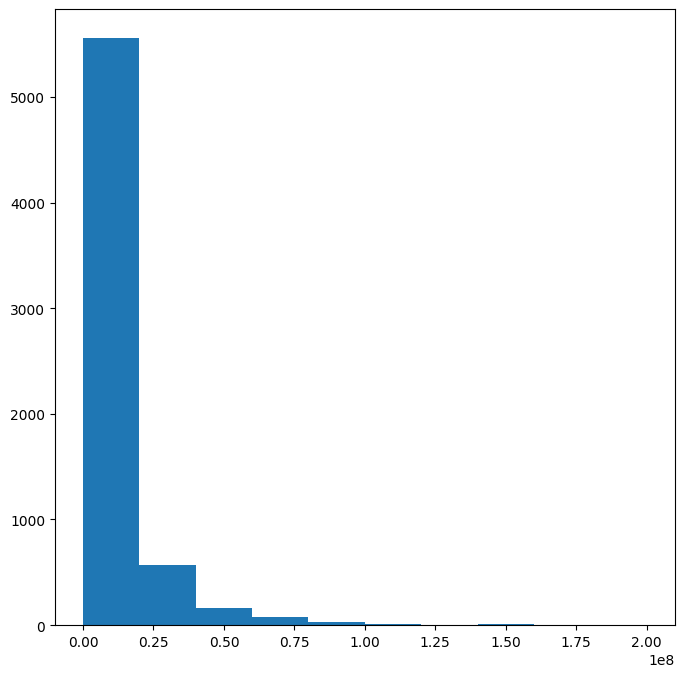

<Figure size 640x480 with 0 Axes>

In [37]:
# Checking the distribution of 'value'
fig = plt.figure(figsize=(8,8))
plt.hist(df3_fp['value'])
plt.figure()

In [38]:
# Changing the column 'value' to 'log_value'
df4_fp['log_value'] = np.log1p(df4_fp['value'])
real_value = df4_fp['value']
df4_fp.drop('value', axis=1, inplace=True)

df4_gk['log_value'] = np.log1p(df4_gk['value'])
real_value = df4_gk['value']
df4_gk.drop('value', axis=1, inplace=True)

df4_fp.head(1)

<ipython-input-38-63fbbb909cf4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_gk['log_value'] = np.log1p(df4_gk['value'])
<ipython-input-38-63fbbb909cf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_gk.drop('value', axis=1, inplace=True)


,nationality,position,squad,foot,league,CL,WinCL,CLBestScorer,Season,age,...,1,2,3,4,5,6,7,8,9,log_value
0,41,1,0,2,1,0.0,0.0,0.0,0,23.0,...,0.79482,0.048132,0.200802,-0.006153,-1.066376,0.003152,-0.097474,1.06044,0.537769,14.403298


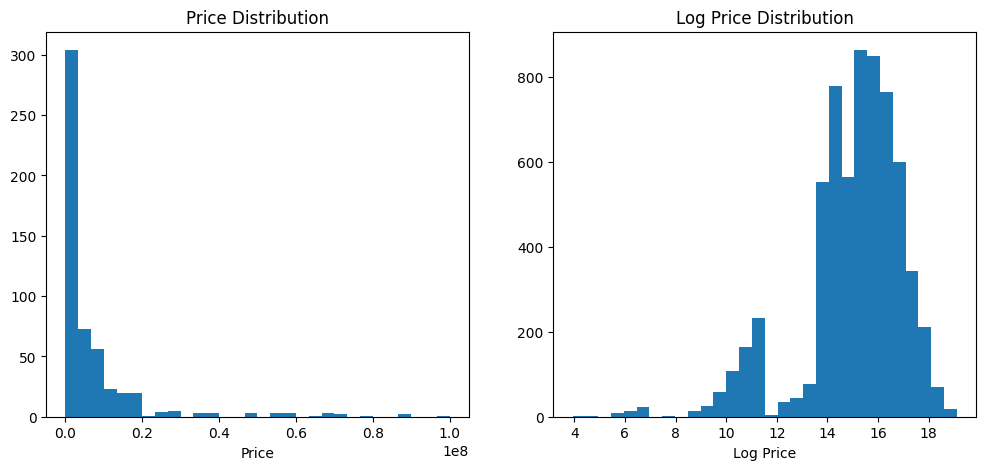

In [39]:
# Visualization for the distributions
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(real_value, bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(df4_fp['log_value'], bins=30)
ax2.set_title('Log Price Distribution')
ax2.set_xlabel('Log Price')
plt.show()

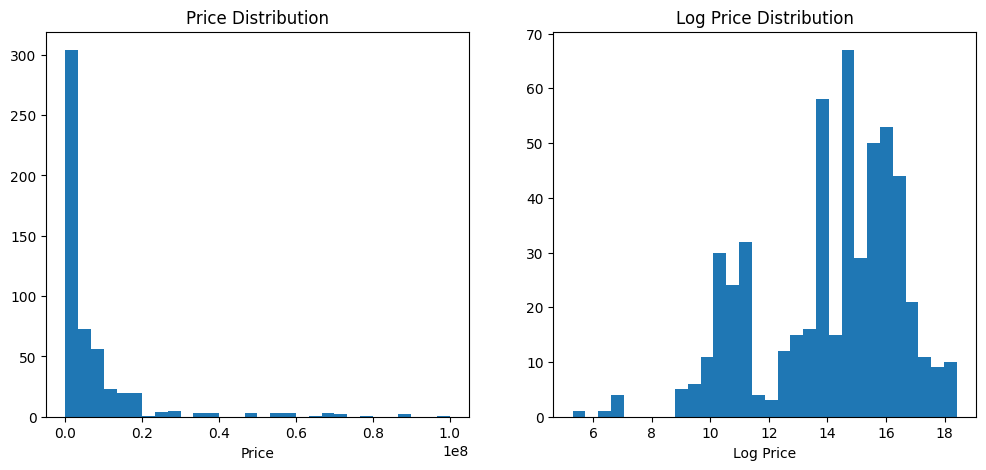

In [40]:
# Same process for goalkeepers data
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.hist(real_value, bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(df4_gk['log_value'], bins=30)
ax2.set_title('Log Price Distribution')
ax2.set_xlabel('Log Price')
plt.show()

## Data modeling

In [41]:
!pip3 install optuna

# Split the data into explanatory variables and response variable
df_X = df4_fp.drop('log_value', axis=1)
df_y = pd.DataFrame(df4_fp['log_value'])

df_gk_X = df3_gk.drop('log_value', axis=1)
df_gk_y = pd.DataFrame(df3_gk['log_value'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2012)
X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(df_gk_X, df_gk_y, test_size=0.2, random_state=2012)

In [43]:
# Field players
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Goalkeepers
print(X_train_gk.shape)
print(X_test_gk.shape)
print(y_train_gk.shape)
print(y_test_gk.shape)

(5136, 21)
(1285, 21)
(5136, 1)
(1285, 1)
(424, 15)
(107, 15)
(424, 1)
(107, 1)


In [47]:
# Modeling
def my_regressor(df_X, df_y):
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import Ridge, Lasso, ElasticNet
  from sklearn.linear_model import ARDRegression, BayesianRidge
  from sklearn.ensemble import RandomForestRegressor
  from xgboost import XGBRegressor
  from sklearn.model_selection import cross_val_score
  
  import ast
  
  linear = LinearRegression()
  ridge, lasso, elasticnet = Ridge(), Lasso(), ElasticNet()
  ardr_linear, baysian_ridge = ARDRegression(), BayesianRidge()
  random_forest = RandomForestRegressor()
  xgboost_linear = XGBRegressor()

  my_model_list = ['linear','ridge','lasso','elasticnet','ardr_linear','baysian_ridge','random_forest','xgboost_linear']
  
  for model_nm in my_model_list:
    if model_nm == 'linear':
      model = LinearRegression()
    elif model_nm == 'ridge':
      model = Ridge()
    elif model_nm == 'lasso':
      model = Lasso()
    elif model_nm == 'elasticnet':
      model = ElasticNet()
    elif model_nm == 'ardr_linear':
      model = ARDRegression()
    elif model_nm == 'baysian_ridge':
      model = BayesianRidge()
    elif model_nm == 'random_forest':
      model = RandomForestRegressor()
    elif model_nm == 'xgboost_linear':
      model = XGBRegressor()

  score_dic = dict()

  for model_nm in my_model_list:
    scores = cross_val_score(model, df_X, df_y, scoring = "neg_mean_squared_error", cv=5)
    rmse_score = np.sqrt(-scores)
    rmse_sm = rmse_score.mean()
    score_dic[model_nm] = rmse_sm

  score_dic = sorted(score_dic.items(), key=lambda t : t[1])

  return score_dic

linear_model_train_score = my_regressor(X_train, y_train)
linear_model_train_score_gk = my_regressor(X_train_gk, y_train_gk)
print(linear_model_train_score)
print(linear_model_train_score_gk)

[('linear', 1.3021809507787743), ('ridge', 1.3021809507787743), ('lasso', 1.3021809507787743), ('elasticnet', 1.3021809507787743), ('ardr_linear', 1.3021809507787743), ('baysian_ridge', 1.3021809507787743), ('random_forest', 1.3021809507787743), ('xgboost_linear', 1.3021809507787743)]
[('linear', 1.5908761304730263), ('ridge', 1.5908761304730263), ('lasso', 1.5908761304730263), ('elasticnet', 1.5908761304730263), ('ardr_linear', 1.5908761304730263), ('baysian_ridge', 1.5908761304730263), ('random_forest', 1.5908761304730263), ('xgboost_linear', 1.5908761304730263)]


In [48]:
# Hyper-parameter tuning for Field players
import xgboost as xgb
from sklearn.model_selection import KFold
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def objective(trial):

    kf = KFold(n_splits=10, shuffle=True)
    
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'folds' : kf
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_train, y_train),(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-25 07:31:13,412] A new study created in memory with name: no-name-4bd775ca-d79d-4c52-a427-7fd9a3200010
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[07:31:13] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:31:54,546] Trial 0 finished with value: 1.1999199887382213 and parameters: {'lambda': 2.6449137930676647, 'alpha': 1.126476220482965, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 42}. Best is trial 0 with value: 1.1999199887382213.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:31:54] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:32:15,310] Trial 1 finished with value: 1.2585047618400502 and parameters: {'lambda': 0.06514737627841048, 'alpha': 0.007755660804742296, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 162}. Best is trial 0 with value: 1.1999199887382213.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:32:15] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:32:37,413] Trial 2 finished with value: 1.311108046473122 and parameters: {'lambda': 0.003602030588048829, 'alpha': 9.877414295983671, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 266}. Best is trial 0 with value: 1.1999199887382213.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:32:37] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:32:53,084] Trial 3 finished with value: 1.276284313913168 and parameters: {'lambda': 0.3554765646718139, 'alpha': 3.661220487140072, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 234}. Best is trial 0 with value: 1.1999199887382213.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/

[07:32:53] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:33:21,607] Trial 4 finished with value: 1.274655862557837 and parameters: {'lambda': 0.03629287756847684, 'alpha': 0.006458339800700777, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.012, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 269}. Best is trial 0 with value: 1.1999199887382213.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:33:21] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:33:56,429] Trial 5 finished with value: 1.200022819681766 and parameters: {'lambda': 3.2145629877744826, 'alpha': 0.04386103851436957, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 17}. Best is trial 0 with value: 1.1999199887382213.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:33:56] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:34:24,127] Trial 6 finished with value: 1.2975618379630727 and parameters: {'lambda': 0.39298155880953395, 'alpha': 0.0744329863550653, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 233}. Best is trial 0 with value: 1.1999199887382213.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:34:24] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:35:11,988] Trial 7 finished with value: 1.1967055250233098 and parameters: {'lambda': 0.012149778543304552, 'alpha': 0.011385228860764422, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 37}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:35:12] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:35:31,067] Trial 8 finished with value: 1.2525447243702832 and parameters: {'lambda': 0.22887032838461824, 'alpha': 0.1671762673401422, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 120}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:35:31] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:36:13,871] Trial 9 finished with value: 1.2096699773210862 and parameters: {'lambda': 6.689416593362891, 'alpha': 1.1926910549999046, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 92}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/

[07:36:13] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:36:40,613] Trial 10 finished with value: 1.2491538593604765 and parameters: {'lambda': 0.0022757758207489695, 'alpha': 0.002505093940338026, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.009, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 66}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/x

[07:36:40] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:37:33,607] Trial 11 finished with value: 1.239726471540288 and parameters: {'lambda': 0.011770623215582088, 'alpha': 0.41949354893262886, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 2}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xg

[07:37:33] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:37:51,158] Trial 12 finished with value: 1.207782777824967 and parameters: {'lambda': 0.0010862893266590549, 'alpha': 0.0011256638296206327, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 53}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages

[07:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:38:28,166] Trial 13 finished with value: 1.2530745352860027 and parameters: {'lambda': 1.6963000867988458, 'alpha': 0.028665243038823743, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 146}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/

[07:38:28] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:38:54,083] Trial 14 finished with value: 1.2104129212847 and parameters: {'lambda': 0.01693910110668107, 'alpha': 0.4359178701019419, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.009, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 42}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:38:54] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:39:25,102] Trial 15 finished with value: 1.2602196838544366 and parameters: {'lambda': 9.893558835650639, 'alpha': 0.018007652626780796, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 99}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:39:25] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:39:52,023] Trial 16 finished with value: 1.2706908248358026 and parameters: {'lambda': 1.3336007936907766, 'alpha': 0.2263240138543886, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 171}. Best is trial 7 with value: 1.1967055250233098.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:39:52] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:40:14,325] Trial 17 finished with value: 1.1905394319016693 and parameters: {'lambda': 0.12910384221298302, 'alpha': 0.9651968390254696, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 36}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:40:14] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:40:32,028] Trial 18 finished with value: 1.2095085016496063 and parameters: {'lambda': 0.08351582044619957, 'alpha': 0.0865545434464413, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 88}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:40:32] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:40:55,596] Trial 19 finished with value: 1.238677449664054 and parameters: {'lambda': 0.013699577066033579, 'alpha': 0.017390044482598357, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 194}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/x

[07:40:55] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:41:14,390] Trial 20 finished with value: 1.211327618327163 and parameters: {'lambda': 0.22410333354006892, 'alpha': 0.05925037484744968, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 25}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:41:14] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:41:34,471] Trial 21 finished with value: 1.2218482755750857 and parameters: {'lambda': 0.7199530363275295, 'alpha': 1.1343215678057268, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 69}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:41:34] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:41:51,722] Trial 22 finished with value: 1.2008884262385096 and parameters: {'lambda': 0.12480112980194716, 'alpha': 1.1071751573855586, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 37}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/x

[07:41:51] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:42:29,074] Trial 23 finished with value: 1.2409458514967093 and parameters: {'lambda': 0.7208490555502769, 'alpha': 3.2386073646265445, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 120}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:42:29] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:43:05,753] Trial 24 finished with value: 1.2276701541457935 and parameters: {'lambda': 0.03438696760753818, 'alpha': 0.15804209597082158, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 2}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:43:05] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:43:44,011] Trial 25 finished with value: 1.2157609753385732 and parameters: {'lambda': 0.006612076403953886, 'alpha': 0.4549228188904668, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 66}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/

[07:43:44] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:43:58,176] Trial 26 finished with value: 1.213270010917192 and parameters: {'lambda': 3.9119112769299083, 'alpha': 0.15589621878775703, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 28}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:43:58] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:44:17,366] Trial 27 finished with value: 1.2936157802087538 and parameters: {'lambda': 0.03528219513724638, 'alpha': 0.6250841382035738, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.009, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 119}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/

[07:44:17] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:44:47,103] Trial 28 finished with value: 1.2155706563830593 and parameters: {'lambda': 0.14022701507331653, 'alpha': 2.5181406838611267, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 55}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:44:47] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:45:06,616] Trial 29 finished with value: 1.2297704328761865 and parameters: {'lambda': 0.06654894946449375, 'alpha': 0.008415489637266377, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 83}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/

[07:45:06] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:45:38,883] Trial 30 finished with value: 1.2175602082583004 and parameters: {'lambda': 0.06385909416862509, 'alpha': 0.11698931582671453, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 141}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xg

[07:45:38] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:46:10,311] Trial 31 finished with value: 1.200082943110946 and parameters: {'lambda': 3.5609778246729964, 'alpha': 0.043673689522316095, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 17}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:46:10] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:46:47,170] Trial 32 finished with value: 1.202328545689359 and parameters: {'lambda': 2.2945154417285956, 'alpha': 0.03892941519670415, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 11}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:46:47] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:47:12,668] Trial 33 finished with value: 1.3323115409790576 and parameters: {'lambda': 0.935472598982549, 'alpha': 7.81137933747011, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 296}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:47:12] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:47:32,593] Trial 34 finished with value: 1.2164111058976117 and parameters: {'lambda': 2.397310156873482, 'alpha': 0.2668477132168417, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 40}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:47:32] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:47:53,348] Trial 35 finished with value: 1.2102088611302924 and parameters: {'lambda': 3.7240891698328515, 'alpha': 0.0982613528555351, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 26}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:47:53] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:48:37,732] Trial 36 finished with value: 1.2189844828425873 and parameters: {'lambda': 0.4434729574437595, 'alpha': 0.06858300430713966, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 51}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:48:37] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:49:09,736] Trial 37 finished with value: 1.2088293679209956 and parameters: {'lambda': 1.262947750800741, 'alpha': 2.0520531445693195, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 77}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[07:49:09] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:49:46,653] Trial 38 finished with value: 1.1975915103401105 and parameters: {'lambda': 0.47610841635566636, 'alpha': 6.934032439064383, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 12}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:49:46] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:50:15,384] Trial 39 finished with value: 1.2166893297804826 and parameters: {'lambda': 0.24712102034775343, 'alpha': 5.022975404362465, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 107}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:50:15] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:50:43,852] Trial 40 finished with value: 1.2503404012416184 and parameters: {'lambda': 0.47995949642870084, 'alpha': 8.023221373924233, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 211}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:50:43] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:51:06,436] Trial 41 finished with value: 1.1929758871907172 and parameters: {'lambda': 0.6801271009528304, 'alpha': 4.62168619967699, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 12}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:51:06] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:51:36,126] Trial 42 finished with value: 1.202056319384845 and parameters: {'lambda': 0.6427846515334843, 'alpha': 5.379931370115662, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 2}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[07:51:36] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:51:49,338] Trial 43 finished with value: 1.1989176943270916 and parameters: {'lambda': 0.30900583369166174, 'alpha': 4.098063691084799, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 40}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:51:49] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:52:05,369] Trial 44 finished with value: 1.198422757050654 and parameters: {'lambda': 0.2930175020780148, 'alpha': 4.549736031569196, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 18}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:52:05] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:52:29,352] Trial 45 finished with value: 1.1986322198444885 and parameters: {'lambda': 0.16107807117341413, 'alpha': 9.047903382325503, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 17}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:52:29] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:52:43,693] Trial 46 finished with value: 1.2076121577124224 and parameters: {'lambda': 0.3031938347722914, 'alpha': 1.9662460119803613, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 55}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:52:43] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:52:58,714] Trial 47 finished with value: 1.1974111184249263 and parameters: {'lambda': 0.19702224357630782, 'alpha': 5.293548768482051, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 29}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:53:35,768] Trial 48 finished with value: 1.1957710826702412 and parameters: {'lambda': 0.16207218155719594, 'alpha': 2.9836029583205765, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 33}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:53:35] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:53:50,226] Trial 49 finished with value: 1.2030486194037215 and parameters: {'lambda': 0.18113226282918377, 'alpha': 2.7060817476185, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 32}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[07:53:50] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:54:16,575] Trial 50 finished with value: 1.2216339977761943 and parameters: {'lambda': 0.10332374446471237, 'alpha': 2.0186724749578726, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 51}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[07:54:16] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:54:57,459] Trial 51 finished with value: 1.195102718099015 and parameters: {'lambda': 0.19756736010688733, 'alpha': 6.056988330836171, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 10}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:54:57] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:55:27,879] Trial 52 finished with value: 1.1932643891116186 and parameters: {'lambda': 0.178585453564267, 'alpha': 5.985988667666954, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 32}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:55:27] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:55:55,512] Trial 53 finished with value: 1.2034381644096261 and parameters: {'lambda': 0.09683792234797606, 'alpha': 3.293356592431665, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 61}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:55:55] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:56:33,283] Trial 54 finished with value: 1.2349204560435834 and parameters: {'lambda': 0.05578322293282297, 'alpha': 9.343033666970854, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 42}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:56:33] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:57:10,816] Trial 55 finished with value: 1.202693624267739 and parameters: {'lambda': 0.13616793942926325, 'alpha': 1.3945489439881864, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 1}. Best is trial 17 with value: 1.1905394319016693.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:57:10] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:57:33,421] Trial 56 finished with value: 1.188791087440358 and parameters: {'lambda': 0.17638611307289442, 'alpha': 3.8538988857846572, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 13}. Best is trial 56 with value: 1.188791087440358.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[07:57:33] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:58:00,651] Trial 57 finished with value: 1.1992308654585004 and parameters: {'lambda': 0.2090831067965854, 'alpha': 3.5484074714426352, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 74}. Best is trial 56 with value: 1.188791087440358.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:58:00] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:58:29,533] Trial 58 finished with value: 1.184167722821997 and parameters: {'lambda': 0.1082899117011074, 'alpha': 6.449640429389442, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 11}. Best is trial 58 with value: 1.184167722821997.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[07:58:29] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:59:09,104] Trial 59 finished with value: 1.1783343208268584 and parameters: {'lambda': 0.32351603816941527, 'alpha': 6.225732423408061, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 14}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[07:59:09] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 07:59:35,087] Trial 60 finished with value: 1.1952188040580443 and parameters: {'lambda': 0.36481304797063646, 'alpha': 6.64273971922072, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 23}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[07:59:35] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:00:07,379] Trial 61 finished with value: 1.1823263707597296 and parameters: {'lambda': 0.11360173188492702, 'alpha': 6.619426435416087, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 10}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:00:07] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:00:42,780] Trial 62 finished with value: 1.189420974945905 and parameters: {'lambda': 0.11469351939419045, 'alpha': 9.8463969219989, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 10}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:00:42] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:01:13,381] Trial 63 finished with value: 1.1788829647091588 and parameters: {'lambda': 0.11559392505533322, 'alpha': 9.498758239051055, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 9}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:01:13] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:01:59,403] Trial 64 finished with value: 1.1944998509658884 and parameters: {'lambda': 0.0959443009189854, 'alpha': 9.941848704115852, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 1}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:01:59] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:02:26,645] Trial 65 finished with value: 1.2067280907774511 and parameters: {'lambda': 0.04976477373328391, 'alpha': 9.835432101729056, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 23}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:02:26] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:03:05,260] Trial 66 finished with value: 1.1881080301572808 and parameters: {'lambda': 0.11849460259664384, 'alpha': 3.898078327035384, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 10}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:03:05] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:03:20,825] Trial 67 finished with value: 1.21679994251508 and parameters: {'lambda': 0.07858755263389713, 'alpha': 3.738370506231322, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 8}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:03:20] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:03:45,302] Trial 68 finished with value: 1.192425823163109 and parameters: {'lambda': 0.04407238899219339, 'alpha': 6.013014624573386, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 48}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:03:45] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:04:14,702] Trial 69 finished with value: 1.2403162457719297 and parameters: {'lambda': 0.12167057532702934, 'alpha': 7.13426275006313, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 243}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:04:14] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:04:41,182] Trial 70 finished with value: 1.1886855790166007 and parameters: {'lambda': 0.07098865121742289, 'alpha': 3.9864263321375057, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 17}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:04:41] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:05:05,214] Trial 71 finished with value: 1.188324213760463 and parameters: {'lambda': 0.08866531768688024, 'alpha': 4.117833545504161, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 23}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:05:05] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:05:28,874] Trial 72 finished with value: 1.1850135846824734 and parameters: {'lambda': 0.07550510354189409, 'alpha': 3.830265591402794, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 22}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:05:28] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:05:46,444] Trial 73 finished with value: 1.187245806036547 and parameters: {'lambda': 0.08019841295029166, 'alpha': 4.366770970340959, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 22}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:05:46] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:06:09,939] Trial 74 finished with value: 1.1874970938285052 and parameters: {'lambda': 0.07483205734512866, 'alpha': 2.5471645013632984, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 22}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:06:09] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:06:29,282] Trial 75 finished with value: 1.1949956776032153 and parameters: {'lambda': 0.03630647970690096, 'alpha': 2.353149775933044, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 42}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:06:29] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:06:54,407] Trial 76 finished with value: 1.1974627721424371 and parameters: {'lambda': 0.07639273451700512, 'alpha': 1.566326127539907, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 21}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:06:54] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:07:31,025] Trial 77 finished with value: 1.2349791215214494 and parameters: {'lambda': 0.02473708992204684, 'alpha': 2.9682182584772576, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 173}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xg

[08:07:31] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:07:47,808] Trial 78 finished with value: 1.1883431988077648 and parameters: {'lambda': 0.06436145581972787, 'alpha': 7.122829859805528, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 34}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:07:47] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:08:14,684] Trial 79 finished with value: 1.2190278088255004 and parameters: {'lambda': 0.10939089035124805, 'alpha': 5.085414993910692, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 61}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:08:14] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:08:38,007] Trial 80 finished with value: 1.202543449575481 and parameters: {'lambda': 0.05480493165927048, 'alpha': 2.67165119319795, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 45}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:08:38] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:08:56,275] Trial 81 finished with value: 1.1872680075632083 and parameters: {'lambda': 0.08529480317803155, 'alpha': 4.636395327400846, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 27}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:08:56] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:09:32,426] Trial 82 finished with value: 1.1835596868372402 and parameters: {'lambda': 0.08549679733043364, 'alpha': 7.724097021349951, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 7}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:09:32] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:10:01,087] Trial 83 finished with value: 1.191651958941416 and parameters: {'lambda': 0.0810682036591932, 'alpha': 7.44475945977991, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 27}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:10:01] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:10:46,973] Trial 84 finished with value: 1.1892403588971339 and parameters: {'lambda': 0.14753375421339962, 'alpha': 5.464636836836998, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 5}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:10:47] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:11:08,667] Trial 85 finished with value: 1.224113739359921 and parameters: {'lambda': 0.04607245137048356, 'alpha': 7.635911816607272, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 16}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:11:08] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:11:34,277] Trial 86 finished with value: 1.1897995247221973 and parameters: {'lambda': 0.2562981480154029, 'alpha': 4.921561690289399, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 27}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:11:34] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:11:51,523] Trial 87 finished with value: 1.2091358415421511 and parameters: {'lambda': 0.06271759915663347, 'alpha': 6.151711183838229, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 36}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:11:51] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:12:30,962] Trial 88 finished with value: 1.1931134287436693 and parameters: {'lambda': 0.07832346812458596, 'alpha': 3.19176569522465, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 6}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:12:31] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:12:54,704] Trial 89 finished with value: 1.18936763163809 and parameters: {'lambda': 0.14501054081799075, 'alpha': 8.048263636956584, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 22}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:12:54] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:13:09,780] Trial 90 finished with value: 1.2274681677927155 and parameters: {'lambda': 0.09171060432152521, 'alpha': 4.665622515065789, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 137}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:13:09] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:13:52,344] Trial 91 finished with value: 1.190139927453386 and parameters: {'lambda': 0.11457955759922511, 'alpha': 2.325685674477899, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 9}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:13:52] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:14:20,877] Trial 92 finished with value: 1.1891926430026112 and parameters: {'lambda': 0.13190972754181898, 'alpha': 4.268108203830955, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 17}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:14:20] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:14:43,088] Trial 93 finished with value: 1.1910700073226799 and parameters: {'lambda': 0.1025267090868673, 'alpha': 3.24319918667477, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 31}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:14:43] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:15:26,501] Trial 94 finished with value: 1.2060910859070082 and parameters: {'lambda': 0.22788174786586768, 'alpha': 6.011209424679765, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 1}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:15:26] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:15:44,706] Trial 95 finished with value: 1.2154590188079264 and parameters: {'lambda': 0.06350125939355689, 'alpha': 1.6792867086000118, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 15}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:15:44] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:16:20,726] Trial 96 finished with value: 1.19068031307876 and parameters: {'lambda': 0.05320874151856562, 'alpha': 8.362007922549328, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 8}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:16:20] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:16:38,537] Trial 97 finished with value: 1.1917673993901474 and parameters: {'lambda': 0.14803445416051567, 'alpha': 2.629366524710594, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 38}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:16:38] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:03,870] Trial 98 finished with value: 1.2075728570672477 and parameters: {'lambda': 0.040932422137981775, 'alpha': 4.7348071946645645, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 57}. Best is trial 59 with value: 1.1783343208268584.
<ipython-input-48-f880d349052c>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-48-f880d349052c>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xg

[08:17:03] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:28,267] Trial 99 finished with value: 1.1989270331820157 and parameters: {'lambda': 0.08375925495346706, 'alpha': 3.5585961950781737, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 28}. Best is trial 59 with value: 1.1783343208268584.


Number of finished trials: 100
Best trial: {'lambda': 0.32351603816941527, 'alpha': 6.225732423408061, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 14}


In [49]:
trial = study.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 1.1783343208268584,
params {'lambda': 0.32351603816941527, 'alpha': 6.225732423408061, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 14}


In [50]:
# Hyper-parameter tuning for goalkeepers
def objective_gk(trial):
    
    kf = KFold(n_splits=10, shuffle=True)

    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'folds' : kf
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(X_train_gk,y_train_gk,eval_set=[(X_train_gk, y_train_gk),(X_test_gk,y_test_gk)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test_gk)
    
    rmse = mean_squared_error(y_test_gk, preds,squared=False)
    
    return rmse

study_gk = optuna.create_study(direction='minimize')
study_gk.optimize(objective_gk, n_trials=100)
print('Number of finished trials:', len(study_gk.trials))
print('Best trial:', study_gk.best_trial.params)

[I 2023-04-25 08:17:28,350] A new study created in memory with name: no-name-8605d780-799e-4dfa-bd24-8e5ee1791c8c
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2

[08:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.

[08:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:28,839] Trial 1 finished with value: 2.4343969417645175 and parameters: {'lambda': 0.005060078888512058, 'alpha': 0.0026418413670293113, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.018, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 241}. Best is trial 1 with value: 2.4343969417645175.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xg

[08:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:29,323] Trial 2 finished with value: 2.407709562705588 and parameters: {'lambda': 0.03738649847241576, 'alpha': 0.015215259698254354, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 101}. Best is trial 2 with value: 2.407709562705588.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:17:29] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:29,892] Trial 3 finished with value: 1.4338990979102555 and parameters: {'lambda': 0.012553263551318779, 'alpha': 0.0645181039457321, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 17}. Best is trial 3 with value: 1.4338990979102555.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:17:29] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:30,886] Trial 4 finished with value: 1.8231345955885871 and parameters: {'lambda': 0.9338439377816463, 'alpha': 0.0017061526915299308, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 75}. Best is trial 3 with value: 1.4338990979102555.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:17:30] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:31,911] Trial 5 finished with value: 1.4059423930832378 and parameters: {'lambda': 0.18511471776390448, 'alpha': 1.141711855752377, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 44}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/

[08:17:31] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:32,429] Trial 6 finished with value: 1.765238232776591 and parameters: {'lambda': 0.0029682504198567544, 'alpha': 0.020499527983730614, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 65}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:17:32] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:36,497] Trial 7 finished with value: 1.5625441550504633 and parameters: {'lambda': 0.013051739263460014, 'alpha': 0.017276174999817314, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.009, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 53}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xg

[08:17:36] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:37,191] Trial 8 finished with value: 1.417642440369207 and parameters: {'lambda': 0.0028671950854929885, 'alpha': 6.79455961633662, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 23}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/s

[08:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.

[08:17:37] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:38,917] Trial 10 finished with value: 1.8462429262264186 and parameters: {'lambda': 0.5466681418645245, 'alpha': 0.726729168768373, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 144}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:17:38] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:39,638] Trial 11 finished with value: 1.4739997098922364 and parameters: {'lambda': 8.089337108547483, 'alpha': 3.6644174707835946, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 2}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/sk

[08:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:40,944] Trial 12 finished with value: 1.8185799044332769 and parameters: {'lambda': 0.001343647977434782, 'alpha': 1.511799417139692, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 130}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:17:40] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:41,499] Trial 13 finished with value: 1.4244947642103631 and parameters: {'lambda': 0.001189612192119203, 'alpha': 8.940792501606502, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.016, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 32}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.

[08:17:41] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:42,773] Trial 15 finished with value: 1.8154537806252307 and parameters: {'lambda': 0.03985883225643818, 'alpha': 1.7614212230762885, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 98}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:17:42] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:43,480] Trial 16 finished with value: 1.4126657300644836 and parameters: {'lambda': 0.025177175453620262, 'alpha': 0.4360596169147583, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 38}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:17:43] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:44,323] Trial 17 finished with value: 1.6877050499065225 and parameters: {'lambda': 0.1682112753224833, 'alpha': 0.254104911782602, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 104}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:17:44] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:44,784] Trial 18 finished with value: 2.4343969409323916 and parameters: {'lambda': 0.022704108608308647, 'alpha': 0.194740294294798, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 163}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:17:44] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:45,334] Trial 19 finished with value: 1.4156576563568795 and parameters: {'lambda': 0.06873469806485549, 'alpha': 1.85127067314304, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 47}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/

[08:17:45] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:46,057] Trial 20 finished with value: 1.5457062028239776 and parameters: {'lambda': 0.17601610619191876, 'alpha': 0.6950408567283444, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 77}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:17:46] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:49,618] Trial 21 finished with value: 1.4090301762663537 and parameters: {'lambda': 0.07574454146953649, 'alpha': 2.72559854118199, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 47}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/

[08:17:49] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:50,229] Trial 22 finished with value: 1.4293209660212498 and parameters: {'lambda': 0.024292947017602165, 'alpha': 3.082798813955862, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 5}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:17:50] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:51,029] Trial 23 finished with value: 1.4249547365277078 and parameters: {'lambda': 0.1184558498852857, 'alpha': 1.0038937975860245, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 41}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/

[08:17:51] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:51,995] Trial 24 finished with value: 1.7311915222000125 and parameters: {'lambda': 0.05495419102533141, 'alpha': 0.347336172668984, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 124}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:17:52] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:53,695] Trial 25 finished with value: 1.6130572695557217 and parameters: {'lambda': 0.3064647934619444, 'alpha': 3.08082406898941, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 82}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost/sk

[08:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:54,258] Trial 26 finished with value: 1.4862229435467622 and parameters: {'lambda': 0.06506888510906816, 'alpha': 1.1946752033298764, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 54}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:54,719] Trial 27 finished with value: 2.4343969421986946 and parameters: {'lambda': 0.09942786165446237, 'alpha': 0.4741571888028977, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 172}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:17:54] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:55,358] Trial 28 finished with value: 1.4073600882685267 and parameters: {'lambda': 0.0245937207952113, 'alpha': 0.12034727985028942, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 31}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:55,818] Trial 29 finished with value: 2.43441914687082 and parameters: {'lambda': 0.09060600474432087, 'alpha': 0.12410179531542832, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 187}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:17:55] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:56,876] Trial 30 finished with value: 1.4172370826621128 and parameters: {'lambda': 0.5043281216225204, 'alpha': 4.545998772764299, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 21}. Best is trial 5 with value: 1.4059423930832378.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:17:56] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:57,463] Trial 31 finished with value: 1.4037921624623175 and parameters: {'lambda': 0.02678565017712322, 'alpha': 0.4502353816880552, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 37}. Best is trial 31 with value: 1.4037921624623175.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:17:57] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:58,200] Trial 32 finished with value: 1.6541188861362817 and parameters: {'lambda': 0.013501095107610616, 'alpha': 0.17826779428090475, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 86}. Best is trial 31 with value: 1.4037921624623175.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:17:58] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:17:58,894] Trial 33 finished with value: 1.5152632574347493 and parameters: {'lambda': 0.040160621550230514, 'alpha': 0.9171145153246382, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 61}. Best is trial 31 with value: 1.4037921624623175.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:17:58] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:03,189] Trial 34 finished with value: 1.491922763605946 and parameters: {'lambda': 0.05064733619475851, 'alpha': 0.07703696859398733, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 3}. Best is trial 31 with value: 1.4037921624623175.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:18:03] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:04,001] Trial 35 finished with value: 1.821139477725144 and parameters: {'lambda': 0.009161643164857966, 'alpha': 2.246910548977417, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 117}. Best is trial 31 with value: 1.4037921624623175.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:04,918] Trial 36 finished with value: 1.4161881520012778 and parameters: {'lambda': 0.02351093551442553, 'alpha': 0.05156354308809097, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 28}. Best is trial 31 with value: 1.4037921624623175.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:04] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:05,505] Trial 37 finished with value: 1.5302472103069458 and parameters: {'lambda': 0.0898439048400668, 'alpha': 0.28532185457527687, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 67}. Best is trial 31 with value: 1.4037921624623175.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:05] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:06,331] Trial 38 finished with value: 1.4008747640630108 and parameters: {'lambda': 0.013702304568900097, 'alpha': 1.0503289417894863, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 15}. Best is trial 38 with value: 1.4008747640630108.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:06,926] Trial 39 finished with value: 1.406635646994449 and parameters: {'lambda': 0.005802890994044611, 'alpha': 1.1589075846356758, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 15}. Best is trial 38 with value: 1.4008747640630108.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:06] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:07,844] Trial 40 finished with value: 1.400192746254668 and parameters: {'lambda': 0.004136668088406425, 'alpha': 1.192311898786272, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 13}. Best is trial 40 with value: 1.400192746254668.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:18:07] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:08,471] Trial 41 finished with value: 1.416238774300808 and parameters: {'lambda': 0.0044943185246367956, 'alpha': 1.2839385771549898, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 14}. Best is trial 40 with value: 1.400192746254668.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:09,313] Trial 42 finished with value: 1.3968223944190794 and parameters: {'lambda': 0.007296436707641132, 'alpha': 0.7843549545553833, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 19}. Best is trial 42 with value: 1.3968223944190794.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:09] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:10,176] Trial 43 finished with value: 1.3994670286038724 and parameters: {'lambda': 0.0033262819270390093, 'alpha': 0.6628884716545791, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 13}. Best is trial 42 with value: 1.3968223944190794.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:18:10] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:10,781] Trial 44 finished with value: 1.4038249434290946 and parameters: {'lambda': 0.0026756009625277335, 'alpha': 0.6720379317959636, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 17}. Best is trial 42 with value: 1.3968223944190794.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:18:10] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.

[08:18:10] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:11,521] Trial 46 finished with value: 1.4193756809600595 and parameters: {'lambda': 0.004193977959930407, 'alpha': 0.775107216951702, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 8}. Best is trial 42 with value: 1.3968223944190794.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:18:11] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:12,649] Trial 47 finished with value: 1.452410746063326 and parameters: {'lambda': 0.0024686096673181166, 'alpha': 0.5418735642821368, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.009, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 31}. Best is trial 42 with value: 1.3968223944190794.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:12] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.

[08:18:12] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:16,182] Trial 49 finished with value: 1.7675439349710615 and parameters: {'lambda': 0.0018642238670532338, 'alpha': 1.4343927508540748, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.012, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 67}. Best is trial 42 with value: 1.3968223944190794.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:18:16] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:17,377] Trial 50 finished with value: 1.6687044257236905 and parameters: {'lambda': 0.007522817410256134, 'alpha': 2.0381707878755253, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 55}. Best is trial 42 with value: 1.3968223944190794.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xg

[08:18:17] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:18,231] Trial 51 finished with value: 1.3912998772028544 and parameters: {'lambda': 0.003467815753759791, 'alpha': 0.6918624848427822, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 19}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:18] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:18,819] Trial 52 finished with value: 1.410727951755596 and parameters: {'lambda': 0.0034254142278407973, 'alpha': 0.49938791265782134, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 25}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:18:18] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:19,578] Trial 53 finished with value: 1.4338375919844861 and parameters: {'lambda': 0.005027148507090741, 'alpha': 0.8376950205394993, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 2}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:19] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:20,433] Trial 54 finished with value: 1.515453087257428 and parameters: {'lambda': 0.006369079390396675, 'alpha': 1.699567886235184, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 39}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:18:20] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:21,055] Trial 55 finished with value: 1.4010941986721466 and parameters: {'lambda': 0.0010437899334760448, 'alpha': 0.3571363348405347, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 19}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:21] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:21,683] Trial 56 finished with value: 1.3966916806802998 and parameters: {'lambda': 0.0014880518839583887, 'alpha': 0.6725533362256567, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 17}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:21] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:22,219] Trial 57 finished with value: 1.448931477109422 and parameters: {'lambda': 0.0017185353143234063, 'alpha': 0.9642860932548888, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 1}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:18:22] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:22,774] Trial 58 finished with value: 1.6197376937359391 and parameters: {'lambda': 0.0034340521779882296, 'alpha': 2.7042051205591324, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 47}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:22] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:23,289] Trial 59 finished with value: 1.4286973268318692 and parameters: {'lambda': 0.0023995247946914833, 'alpha': 0.6871648135543255, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 25}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:23] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:24,156] Trial 60 finished with value: 1.828047320380752 and parameters: {'lambda': 0.0016343996228026364, 'alpha': 1.476607539844514, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.009, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 94}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:24] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:24,943] Trial 61 finished with value: 1.4018278159096542 and parameters: {'lambda': 0.0010544101419456338, 'alpha': 0.28615379347528436, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 15}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:18:24] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:25,792] Trial 62 finished with value: 1.404236411973192 and parameters: {'lambda': 0.001015761823826569, 'alpha': 0.5658051950404929, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 16}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:18:25] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:26,371] Trial 63 finished with value: 1.4913986757302231 and parameters: {'lambda': 0.0014663870190995746, 'alpha': 0.3705376183640569, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 34}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:26] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:27,265] Trial 64 finished with value: 1.4084454013732457 and parameters: {'lambda': 0.0021214067232084004, 'alpha': 1.047678157408082, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 11}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:27] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:30,597] Trial 65 finished with value: 1.5848999021616343 and parameters: {'lambda': 0.003739955031815797, 'alpha': 0.657403041655617, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 46}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:18:30] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:31,170] Trial 66 finished with value: 1.411024148504584 and parameters: {'lambda': 0.0013531970545932895, 'alpha': 0.22820554155198988, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 25}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:31] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:31,790] Trial 67 finished with value: 1.5180952112998563 and parameters: {'lambda': 0.0031701602791373443, 'alpha': 0.8431754486454118, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.012, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 62}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgb

[08:18:31] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:32,634] Trial 68 finished with value: 1.524733716222955 and parameters: {'lambda': 0.002321174056273772, 'alpha': 0.37786225890422565, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 39}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xg

[08:18:32] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:33,090] Trial 69 finished with value: 2.434396962440939 and parameters: {'lambda': 0.001334703547936959, 'alpha': 2.1076306895406507, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 143}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:33] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:34,021] Trial 70 finished with value: 1.5322068336730863 and parameters: {'lambda': 0.005214745028446381, 'alpha': 1.3236544681786122, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.016, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 51}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:34] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:34,630] Trial 71 finished with value: 1.4160446796862163 and parameters: {'lambda': 0.0010854696961490236, 'alpha': 0.3440414476472358, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 11}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:34] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:35,463] Trial 72 finished with value: 1.3950635324282659 and parameters: {'lambda': 0.0019980327090074065, 'alpha': 0.5382521178241958, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 20}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:35] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:36,170] Trial 73 finished with value: 1.3969382131695276 and parameters: {'lambda': 0.0018133814442006675, 'alpha': 1.0237633194957767, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 23}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:36] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:36,799] Trial 74 finished with value: 1.4594663948724849 and parameters: {'lambda': 0.001953938397790023, 'alpha': 1.04658194201621, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 31}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:18:36] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:37,477] Trial 75 finished with value: 1.4337863899534535 and parameters: {'lambda': 0.003077065819044924, 'alpha': 0.5797467125482171, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 7}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:37] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:38,442] Trial 76 finished with value: 1.4315180405283472 and parameters: {'lambda': 0.0038573952835674386, 'alpha': 1.4863610176032374, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 25}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:38] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:39,118] Trial 77 finished with value: 1.3944543155796638 and parameters: {'lambda': 0.004672199338576309, 'alpha': 3.644690261327746, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 40}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:39] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:39,916] Trial 78 finished with value: 1.428980909333141 and parameters: {'lambda': 0.0026323238081284728, 'alpha': 4.139830984331314, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 43}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:18:39] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:41,331] Trial 79 finished with value: 1.4977327239311338 and parameters: {'lambda': 0.0045148585828847934, 'alpha': 3.196046866326359, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 75}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:41] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:44,317] Trial 80 finished with value: 1.4098159476323593 and parameters: {'lambda': 0.0018538967959715628, 'alpha': 1.998285110099321, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 35}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:44] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:45,113] Trial 81 finished with value: 1.420808435111843 and parameters: {'lambda': 0.0071348118755946216, 'alpha': 7.611642483593658, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 20}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:45] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:45,919] Trial 82 finished with value: 1.405637519131779 and parameters: {'lambda': 0.0029177163296901752, 'alpha': 0.7710177305554774, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 11}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:45] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:46,714] Trial 83 finished with value: 1.403504798083882 and parameters: {'lambda': 0.005428379881034736, 'alpha': 1.1491856007083292, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 7}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:18:46] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:47,223] Trial 84 finished with value: 1.705340077718632 and parameters: {'lambda': 0.004278265083025971, 'alpha': 2.50286606521546, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 56}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:18:47] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:47,821] Trial 85 finished with value: 1.3944468367088303 and parameters: {'lambda': 0.0021999067823351435, 'alpha': 1.8001758430342236, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 22}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:47] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:48,306] Trial 86 finished with value: 1.4595215487900604 and parameters: {'lambda': 0.0014134523309925126, 'alpha': 1.6668439348585704, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 1}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:48] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:48,803] Trial 87 finished with value: 1.455707153287045 and parameters: {'lambda': 0.002123920320158284, 'alpha': 3.684501858822686, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 30}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:18:48] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:49,593] Trial 88 finished with value: 1.3967917344091485 and parameters: {'lambda': 0.0025625213563139223, 'alpha': 2.413248168050375, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 23}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:49] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:50,308] Trial 89 finished with value: 1.402136156558521 and parameters: {'lambda': 0.0016257866674745697, 'alpha': 2.621873685309087, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 21}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboo

[08:18:50] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:51,029] Trial 90 finished with value: 1.4768564394636914 and parameters: {'lambda': 0.002525555244521836, 'alpha': 6.0481108967089545, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 40}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:51] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:51,714] Trial 91 finished with value: 1.4321375072333207 and parameters: {'lambda': 0.0035619951215754703, 'alpha': 0.8789445771547428, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 25}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:51] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:52,422] Trial 92 finished with value: 1.501292431318039 and parameters: {'lambda': 0.0020639497263734456, 'alpha': 1.6185974504291998, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.012, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 34}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:52] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:52,932] Trial 93 finished with value: 1.3977778422705267 and parameters: {'lambda': 0.0026369395757463495, 'alpha': 1.2849843756732602, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 19}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:52] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:53,538] Trial 94 finished with value: 1.4176354298595295 and parameters: {'lambda': 0.0029574799458234624, 'alpha': 2.2094414846384645, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 21}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:53] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:54,341] Trial 95 finished with value: 1.5241550404343378 and parameters: {'lambda': 0.0012576098779345378, 'alpha': 0.4933878732077086, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 48}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:54] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:57,280] Trial 96 finished with value: 1.4096207527565072 and parameters: {'lambda': 0.0017491234289612515, 'alpha': 1.833957708549992, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 7}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboost

[08:18:57] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:58,197] Trial 97 finished with value: 2.434396945164302 and parameters: {'lambda': 0.002331865823004493, 'alpha': 1.3256313246237352, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 191}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgboos

[08:18:58] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:59,116] Trial 98 finished with value: 1.5698446793191152 and parameters: {'lambda': 0.003194495174359373, 'alpha': 0.6373334050169919, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.016, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 57}. Best is trial 51 with value: 1.3912998772028544.
<ipython-input-50-9441937f327c>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
<ipython-input-50-9441937f327c>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/usr/local/lib/python3.9/dist-packages/xgbo

[08:18:59] WARNING: ../src/learner.cc:767: 
Parameters: { "folds" } are not used.



[I 2023-04-25 08:18:59,635] Trial 99 finished with value: 2.4344653654484567 and parameters: {'lambda': 0.0016015309219615018, 'alpha': 0.8666190708417577, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 295}. Best is trial 51 with value: 1.3912998772028544.


Number of finished trials: 100
Best trial: {'lambda': 0.003467815753759791, 'alpha': 0.6918624848427822, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 19}


In [51]:
trial_gk = study_gk.best_trial
trial_params_gk = trial_gk.params
print('Best Trial: score {},\nparams {}'.format(trial_gk.value, trial_params_gk))

Best Trial: score 1.3912998772028544,
params {'lambda': 0.003467815753759791, 'alpha': 0.6918624848427822, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 19}


In [52]:
# Fitting data for field players
xgb_model = xgb.XGBRegressor(**trial_params)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [53]:
# Fitting data for goalkeepers
xgb_model_gk = xgb.XGBRegressor(**trial_params_gk)
xgb_model_gk.fit(X_train_gk, y_train_gk)
y_pred_gk = xgb_model_gk.predict(X_test_gk)

## Model evaluation

In [54]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

3.283394669299706


In [55]:
rmse_gk = mean_squared_error(y_test_gk, y_pred_gk, squared=False)
print(rmse_gk)

3.83305167154716


In [56]:
# Feature importance for field players
import plotly.express as px

X_train = pd.DataFrame(X_train, columns = X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

d={"Stats" : X_train.columns , "FI" : xgb_model.feature_importances_}
df = pd.DataFrame(d)
df = df.sort_values(by='FI', ascending=0)

fig = px.bar(df, x='Stats', y='FI', color="Stats", template="plotly_dark")
fig.show()

In [57]:
# Feature importance for goalkeepers
X_train_gk = pd.DataFrame(X_train_gk, columns = X_train_gk.columns)
X_test_gk = pd.DataFrame(X_test_gk, columns=X_test_gk.columns)

d={"Stats" : X_train_gk.columns , "FI" : xgb_model_gk.feature_importances_}
df_gk = pd.DataFrame(d)
df_gk = df_gk.sort_values(by='FI', ascending=0)

fig = px.bar(df_gk, x='Stats', y='FI', color="Stats", template="plotly_dark")
fig.show()  